In [38]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

In [39]:
""" Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good" """

' Use decision trees to prepare a model on fraud data \ntreating those who have taxable_income <= 30000 as "Risky" and others are "Good" '

In [40]:
# Load the dataset using pandas
data = pd.read_csv("E:\\Decision Trees\\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [41]:
# creating a dataframe using pandas.
df=pd.DataFrame(data)
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [42]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [43]:
# as the data contains many categorical variables we have to convert them into int64 datatypes using the labelencoder
encoder = LabelEncoder()

In [44]:
# label encoding the object data types
df['Undergrad']=encoder.fit_transform(df['Undergrad'])
df['Urban']=encoder.fit_transform(df['Urban'])
df['Marital.Status']=encoder.fit_transform(df['Marital.Status'])

In [45]:
df.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

In [46]:
# inserting a new columns for seeing the income is taxable or not
data.insert(6,'taxable','')

In [47]:
for i in range(0,len(data['taxable']),1):
    if data['Taxable.Income'][i]<=30000:
        data['taxable'][i]='1'
    else:
        data['taxable'][i]='0'

In [48]:
data['taxable']=data['taxable'].astype(int)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   taxable          600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [50]:
# partiotioning the data into independant and dependant variables
x=data[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
y=data['taxable']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [52]:
# RandomForest_classifier model
model_rf = RandomForestClassifier()

In [53]:
# Decisiontree_classifier model fitting
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
y_pred_test = model_rf.predict(x_test)

In [55]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [68]:
print(accuracy_score(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
RF_scores=accuracy_score(y_test,y_pred_test)


0.75
[[134   7]
 [ 38   1]]


<AxesSubplot: >

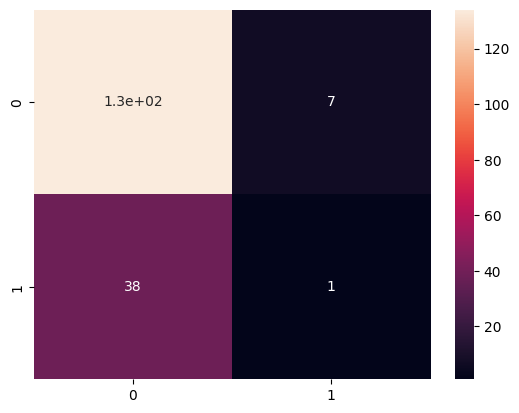

In [57]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_test,annot=True)

In [58]:
# using gridsearchcv(hyperparameter) from Randomforest
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = model_rf,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4],
                                                        'n_estimators' : [100]})
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100]})

In [59]:
model_gs=RandomForestClassifier( n_estimators=20,min_samples_split=4,max_depth=10,min_samples_leaf=3).fit(x_train,y_train)

In [60]:
y_pred_train_tweak=model_gs.predict(x_train)
y_pred_test_tweak=model_gs.predict(x_test)

In [61]:
print(classification_report(y_test,y_pred_test_tweak))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       141
           1       0.00      0.00      0.00        39

    accuracy                           0.77       180
   macro avg       0.39      0.49      0.44       180
weighted avg       0.61      0.77      0.68       180



In [62]:
print(accuracy_score(y_test,y_pred_test_tweak))
print(confusion_matrix(y_test,y_pred_test))
GS_score=accuracy_score(y_test,y_pred_test_tweak)

0.7722222222222223
[[134   7]
 [ 38   1]]


In [64]:
# using classweight hyperparameter
model_cw=RandomForestClassifier(class_weight={0:1,1:5}).fit(x_train,y_train)

In [65]:
y_pred=model_cw.predict(x_test)

In [66]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred_test))
CW_scores=accuracy_score(y_test,y_pred)

0.7666666666666667
[[134   7]
 [ 38   1]]


In [69]:
#make a table containing R^2-adj value for each prepared model.
scores={'Rf_models':['Random Forest','Grid Search',"Class weight"],'Accuracy_scores':[RF_scores,GS_score,CW_scores],'AUC_roc_scores':[DT_auc_score,GS_auc_score,""]}
table=pd.DataFrame(scores)
table

# Grid search has the highest accuracy scores among the other models.
# RFE is not used as there are less variables we cant eliminate them.

,Rf_models,Accuracy_scores,AUC_roc_scores
0,Random Forest,0.750000,0.461806
1,Grid Search,0.772222,0.5
2,Class weight,0.766667,
